In [75]:
using ITensors, ITensorMPS, Optim, LinearAlgebra, Printf, Random, Plots, DelimitedFiles
include("src/basic_CPHL_utils.jl")


N_g = 30;
g_vals = collect(range(-1, 1; length = N_g + 2)[2:end-1]);

In [76]:
M_max = 5 
DesignMat, HarmFromVecMat = ConstructDesignMatrix(g_vals, M_max)

CMat = zeros(Float64, length(g_vals), 2)

CMat[:, 1] = sin.(pi * 1 .* (g_vals .+ 1) / 2) + 0.1 * sin.(pi * 2 .* (g_vals .+ 1) / 2) - 0.3 * sin.(pi * 3 .* (g_vals .+ 1) / 2) - 0.13 * sin.(pi * 5 .* (g_vals .+ 1) / 2)
CMat[:, 2] = -0.2 * sin.(pi * 1 .* (g_vals .+ 1) / 2)


ALPHAMat =  zeros(M_max, 2);
ALPHAMat[:, 1] = [1; 0.1; -0.3; 0.0; -0.13]
ALPHAMat[:, 2] = [-0.2; 0; 0; 0; 0]

@show norm(ALPHAMat - EstimateHarmFromCMat(CMat, HarmFromVecMat))

norm(GenerateCMatFromALPHAMat(ALPHAMat, DesignMat) - CMat)

norm(ALPHAMat - EstimateHarmFromCMat(CMat, HarmFromVecMat)) = 6.966282800046645e-14


4.0141141393567177e-16

In [77]:
typeof(g_vals)

Vector{Float64} (alias for Array{Float64, 1})

In [ ]:
include("src/CPHL_module.jl")

cphl = CPHL.CPHLSolver(20, g_vals)

Fidelity wrt to GHZ = 1.0


Fidelity wrt to cluster state = 1.0


Main.CPHL.CPHLSolver(10, Index{Int64}[(dim=2|id=900|"S=1/2,Site,n=1"), (dim=2|id=134|"S=1/2,Site,n=2"), (dim=2|id=595|"S=1/2,Site,n=3"), (dim=2|id=962|"S=1/2,Site,n=4"), (dim=2|id=99|"S=1/2,Site,n=5"), (dim=2|id=721|"S=1/2,Site,n=6"), (dim=2|id=341|"S=1/2,Site,n=7"), (dim=2|id=842|"S=1/2,Site,n=8"), (dim=2|id=157|"S=1/2,Site,n=9"), (dim=2|id=761|"S=1/2,Site,n=10")], [-0.9354838709677419, -0.8709677419354839, -0.8064516129032258, -0.7419354838709677, -0.6774193548387096, -0.6129032258064516, -0.5483870967741935, -0.4838709677419355, -0.41935483870967744, -0.3548387096774194  …  0.3548387096774194, 0.41935483870967744, 0.4838709677419355, 0.5483870967741935, 0.6129032258064516, 0.6774193548387096, 0.7419354838709677, 0.8064516129032258, 0.8709677419354839, 0.9354838709677419], 30, 3, [0.10116832198743225 0.20129852008866023 0.29936312297335815; 0.20129852008866006 0.39435585511331855 0.5712682150947923; … ; 0.20129852008866017 -0.3943558551133187 0.5712682150947918; 0.10116832198743228 -

In [79]:
CPHL.SetUpHamiltonians(cphl)


After sweep 1 energy=-9.67983883617216  maxlinkdim=2 maxerr=1.05E-11 time=0.004
After sweep 2 energy=-9.679838840342065  maxlinkdim=2 maxerr=2.15E-12 time=0.004
After sweep 3 energy=-9.679838840342065  maxlinkdim=2 maxerr=1.34E-12 time=0.003
After sweep 4 energy=-9.679838840342079  maxlinkdim=2 maxerr=1.34E-12 time=0.003
After sweep 5 energy=-9.679838840342068  maxlinkdim=2 maxerr=1.34E-12 time=0.004
After sweep 6 energy=-9.679838840342072  maxlinkdim=2 maxerr=1.34E-12 time=0.003
After sweep 7 energy=-9.679838840342063  maxlinkdim=2 maxerr=1.34E-12 time=0.004
After sweep 8 energy=-9.679838840342068  maxlinkdim=2 maxerr=1.34E-12 time=0.028
g = -0.9354838709677419, GS energy = -9.679838840342068
After sweep 1 energy=-9.36485212753824  maxlinkdim=5 maxerr=6.25E-11 time=0.004
After sweep 2 energy=-9.364852148036187  maxlinkdim=3 maxerr=8.76E-11 time=0.004
After sweep 3 energy=-9.36485214803915  maxlinkdim=3 maxerr=5.14E-11 time=0.005
After sweep 4 energy=-9.364852148040402  maxlinkdim=3 ma

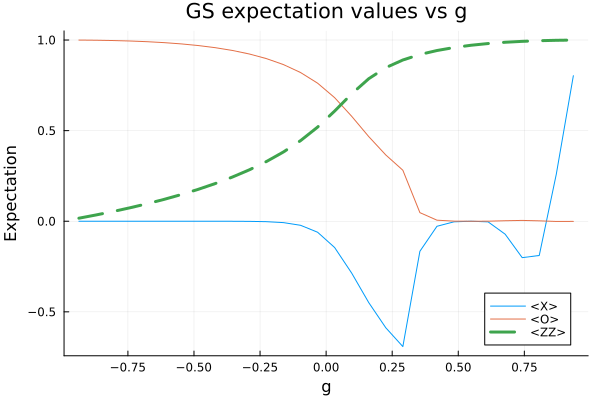

In [80]:
p = plot(cphl.g_vals, cphl.XString_GS_vals, label="<X>", title="GS expectation values vs g", xlabel="g", ylabel="Expectation",linewidth=1);
plot!(p, cphl.g_vals, cphl.OString_GS_vals, label="<O>",linewidth=1);
plot!(p, cphl.g_vals, cphl.ZZ_GS_vals / (cphl.N_sites - 1), label="<ZZ>",linestyle=:dash,linewidth=3);

display(p)